In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import math
#from mpldatacursor import HighlightingDataCursor
#from mpldatacursor import datacursor

In [2]:
ll

total 7141
drwxr-xr-x 2 rickettsia      74 Feb 22 21:09 data/
-rw-r--r-- 1 rickettsia 7035875 Feb 22 21:10 EMS_Screen.ipynb
drwxrwxr-x 2 rickettsia      75 Feb 22 20:08 Epgp4HctAmKt2IhtAmNG_Isolation_20X_02212020_3/
drwxrwxr-x 2 rickettsia      75 Feb 22 19:52 pgp4HI_20X_Iso_02212020_3/
drwxr-xr-x 2 rickettsia      22 Feb 22 20:53 test/
drwxr-xr-x 2 rickettsia      54 Feb 22 21:02 Zreduced/


In [3]:
#imports all csv files in folder and concatonates the data sets from trackmate
import glob

df = pd.DataFrame()
for filename in glob.glob('data/*.csv'):
    data_01 = pd.read_csv(filename, sep=',')
    filename = filename.split('/')[1]
    filename = filename.split('.')[0]
    well = filename.split('_')[6]
    data_01['Well'] = well.split('-')[0]
    data_01['FOV'] = filename.split('_')[7]
    data = data_01[['Frame','Track_ID', 'Well', 'FOV', 'X', 'Y', 'Channel_1', 'Channel_2']]
    df = df.append(data,  ignore_index=True)
df['Sample_ID'] = df.Well + '-' + df.FOV
df['Sample_ID'] = df.Sample_ID + '-Track-' + df.Track_ID.astype(str)

In [4]:
df

Frame  Track_ID Well FOV      X      Y    Channel_1    Channel_2  \
0       17.0       367   A2   7  682.0  430.0   317.991476   741.469366   
1       32.0       367   A2   7  682.0  428.0  1634.075120  2189.446990   
2       21.0       367   A2   7  682.0  428.0   783.976026  1727.548215   
3       22.0       367   A2   7  682.0  427.0   896.550879  1785.086841   
4       25.0       367   A2   7  682.0  425.0  1065.201385  1780.946723   
...      ...       ...  ...  ..    ...    ...          ...          ...   
28259   40.0       880   B3   4  609.0  682.0  1040.681939  1841.065530   
28260   37.0       880   B3   4  611.0  682.0  1001.372936  1719.954715   
28261   20.0       880   B3   4  612.0  682.0   292.838039   757.006393   
28262   39.0       880   B3   4  609.0  682.0  1043.613745  1798.354289   
28263   42.0       880   B3   4  609.0  682.0  1254.789025  2090.890783   

            Sample_ID  
0      A2-7-Track-367  
1      A2-7-Track-367  
2      A2-7-Track-367  
3      A2-7-Track-367  
4      A2-7-Track-367  
...               ...  
28259  B3-4-Track-880  
28260  B3-4-Track-880  
28261  B3-4-Track-880  
28262  B3-4-Track-880  
28263  B3-4-Track-880  

[28264 rows x 9 columns]

In [5]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_1')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_1'] = df_test['Channel_1']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df)

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_2')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_2'] = df_test['Channel_2']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df_bl)

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df_bl

Frame  Track_ID Well FOV           X           Y    Channel_1  \
16018   23.0      1108   A1   0  306.537061  398.173619  1003.182206   
16019   37.0      1108   A1   0  302.467845  397.184734  2736.752264   
16020   30.0      1108   A1   0  302.488850  395.354006  2055.576452   
16021   29.0      1108   A1   0  303.162329  396.482344  1962.156100   
16022   32.0      1108   A1   0  303.053691  395.464678  2275.394779   
...      ...       ...  ...  ..         ...         ...          ...   
4130    35.0       730   B3   9   27.000000  682.000000   207.215237   
4131    19.0       730   B3   9   32.000000  682.000000   225.921151   
4132    28.0       730   B3   9   24.000000  682.000000   224.590304   
4133    37.0       730   B3   9   28.000000  682.000000   251.177411   
4134    22.0       730   B3   9   26.000000  682.000000   194.486947   

         Channel_2        Sample_ID  bc_channel_1  bc_channel_2  
16018  1236.392648  A1-0-Track-1108      0.000000      0.000000  
16019  2282.541289  A1-0-Track-1108   1733.570059   1046.148641  
16020  1957.190197  A1-0-Track-1108   1052.394246    720.797549  
16021  1850.468300  A1-0-Track-1108    958.973895    614.075653  
16022  1892.911561  A1-0-Track-1108   1272.212573    656.518913  
...            ...              ...           ...           ...  
4130    378.732552   B3-9-Track-730     21.337240     15.735216  
4131    462.129462   B3-9-Track-730     40.043154     99.132126  
4132    409.173681   B3-9-Track-730     38.712307     46.176345  
4133    417.171018   B3-9-Track-730     65.299414     54.173681  
4134    391.920618   B3-9-Track-730      8.608950     28.923282  

[28264 rows x 11 columns]

In [8]:
df_bl.to_pickle("baseLine_subtract.pkl")

In [9]:
df_bl = pd.read_pickle("baseLine_subtract.pkl")
df_f=df_bl

In [10]:
#filtering out inclusion near the edges of the field of view.
df2 = df_f[~(df_f['X']<10)]
df2 = df2[~(df2['X']>670)]
df2 = df2[~(df2['Y']<10)]
df2 = df2[~(df2['Y']>670)]
#df2 = df_f

In [11]:
df2

Frame  Track_ID Well FOV           X           Y    Channel_1  \
16018   23.0      1108   A1   0  306.537061  398.173619  1003.182206   
16019   37.0      1108   A1   0  302.467845  397.184734  2736.752264   
16020   30.0      1108   A1   0  302.488850  395.354006  2055.576452   
16021   29.0      1108   A1   0  303.162329  396.482344  1962.156100   
16022   32.0      1108   A1   0  303.053691  395.464678  2275.394779   
...      ...       ...  ...  ..         ...         ...          ...   
3816    22.0        58   B3   9  283.397519  147.809719  2130.852424   
3817    11.0        58   B3   9  284.487394  149.383026   552.201385   
3818    32.0        58   B3   9  284.607467  142.072177  3535.583910   
3819    40.0        58   B3   9  285.176634  142.280010  4835.566862   
3820     2.0        58   B3   9  282.284670  146.936733   337.233884   

         Channel_2        Sample_ID  bc_channel_1  bc_channel_2  
16018  1236.392648  A1-0-Track-1108      0.000000      0.000000  
16019  2282.541289  A1-0-Track-1108   1733.570059   1046.148641  
16020  1957.190197  A1-0-Track-1108   1052.394246    720.797549  
16021  1850.468300  A1-0-Track-1108    958.973895    614.075653  
16022  1892.911561  A1-0-Track-1108   1272.212573    656.518913  
...            ...              ...           ...           ...  
3816   2497.898775    B3-9-Track-58   1825.346297   1857.395844  
3817   1375.786894    B3-9-Track-58    246.695258    735.283964  
3818   3571.637187    B3-9-Track-58   3230.077784   2931.134257  
3819   4477.185935    B3-9-Track-58   4530.060735   3836.683005  
3820    853.925413    B3-9-Track-58     31.727757    213.422483  

[25229 rows x 11 columns]

In [12]:
#start time 12
#B = IhtA-HctA
#C = Euo-HctB

In [13]:
totalFrames = 45
startTime = 14
interval = 0.5

frame_dict = {}
for i in range(totalFrames):
    if i == 0:
        frame = i 
        frame_dict[frame] = startTime+1
    else:
        frame = i 
        startTime += interval
        frame_dict[frame] = startTime+1
#frame_dict

In [14]:
df2['Time'] = df2['Frame'].map(frame_dict)

In [15]:
#want to make a list of Sample_IDs that have signal at two time points.
df_f1 = df2['Sample_ID'][df2['Time']==25]
df_f2 = df2['Sample_ID'][df2['Time']==35]
df_f3 = df_f1[df_f1.isin(df_f2)]
df3 = df2[df2['Sample_ID'].isin(df_f3)]

In [16]:
#df3['ratio']=df3['Channel_2']/df3['Channel_1']

In [17]:
df3

Frame  Track_ID Well FOV           X           Y    Channel_1  \
15801   35.0       349   A1   0   31.814080  466.354244  2622.807672   
15802   24.0       349   A1   0   36.355709  469.910902  1452.558871   
15803   20.0       349   A1   0   38.356100  475.300553   986.068194   
15804   28.0       349   A1   0   33.952193  468.137022  1860.053809   
15805    6.0       349   A1   0   34.136335  475.176540   366.917421   
...      ...       ...  ...  ..         ...         ...          ...   
3816    22.0        58   B3   9  283.397519  147.809719  2130.852424   
3817    11.0        58   B3   9  284.487394  149.383026   552.201385   
3818    32.0        58   B3   9  284.607467  142.072177  3535.583910   
3819    40.0        58   B3   9  285.176634  142.280010  4835.566862   
3820     2.0        58   B3   9  282.284670  146.936733   337.233884   

         Channel_2       Sample_ID  bc_channel_1  bc_channel_2  Time  
15801  2453.883324  A1-0-Track-349   2304.707512   1782.310602  32.5  
15802  1751.569526  A1-0-Track-349   1134.458711   1079.996803  27.0  
15803  1587.349494  A1-0-Track-349    667.968034    915.776771  25.0  
15804  2042.279702  A1-0-Track-349   1541.953649   1370.706979  29.0  
15805   671.572722  A1-0-Track-349     48.817262      0.000000  18.0  
...            ...             ...           ...           ...   ...  
3816   2497.898775   B3-9-Track-58   1825.346297   1857.395844  26.0  
3817   1375.786894   B3-9-Track-58    246.695258    735.283964  20.5  
3818   3571.637187   B3-9-Track-58   3230.077784   2931.134257  31.0  
3819   4477.185935   B3-9-Track-58   4530.060735   3836.683005  35.0  
3820    853.925413   B3-9-Track-58     31.727757    213.422483  16.0  

[23805 rows x 12 columns]

In [18]:
# Wt = wildtype, Mt = mutant
IN    = df3[df3['Well'].str.contains("A1").fillna(False)|df3['Well'].str.contains("A2").fillna(False)|df3['Well'].str.contains("A3").fillna(False)]
            
UN    = df3[df3['Well'].str.contains("B1").fillna(False)|df3['Well'].str.contains("B2").fillna(False)|df3['Well'].str.contains("B3").fillna(False)]

In [128]:
#need new filter
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
def filterII(in_df, threshold):
    traces_p =       in_df.pivot_table(index='Frame', columns='Sample_ID', values='bc_channel_2')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for cn in traces_p.columns:
        index_min = traces_p[cn].idxmin(axis=1, skipna=True)
        min_value = traces_p[cn].min()
        traces_p_min = traces_p[traces_p.index>=index_min]
        max_value = traces_p_min[cn].max()
        #index_max = traces_p_min[cn].idxmax(axis=1, skipna=True)
       
        if max_value > threshold*(abs(min_value)+1):
            df_pass = df_pass.append({'Sample_ID':cn, 'pass': True}, ignore_index=True)
            #print(abs(min_value)+1)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
IN_f=  filterII(IN,1500)
UN_f=  filterII(UN,1500)

In [129]:
IN_f

Frame  Track_ID Well FOV          X           Y    Channel_1  \
0       35.0       349   A1   0  31.814080  466.354244  2622.807672   
1       24.0       349   A1   0  36.355709  469.910902  1452.558871   
2       20.0       349   A1   0  38.356100  475.300553   986.068194   
3       28.0       349   A1   0  33.952193  468.137022  1860.053809   
4        6.0       349   A1   0  34.136335  475.176540   366.917421   
...      ...       ...  ...  ..        ...         ...          ...   
10761    4.0        97   A3   9  24.246694  148.890998   341.995205   
10762    3.0        97   A3   9  26.792653  148.260213   337.061801   
10763   17.0        97   A3   9  19.179491  144.407934  1154.468300   
10764   11.0        97   A3   9  21.642955  145.741831   524.248801   
10765   24.0        97   A3   9  19.289459  131.520029  2084.933404   

         Channel_2       Sample_ID  bc_channel_1  bc_channel_2  Time  pass  
0      2453.883324  A1-0-Track-349   2304.707512   1782.310602  32.5  True  
1      1751.569526  A1-0-Track-349   1134.458711   1079.996803  27.0  True  
2      1587.349494  A1-0-Track-349    667.968034    915.776771  25.0  True  
3      2042.279702  A1-0-Track-349   1541.953649   1370.706979  29.0  True  
4       671.572722  A1-0-Track-349     48.817262      0.000000  18.0  True  
...            ...             ...           ...           ...   ...   ...  
10761   782.554608   A3-9-Track-97     29.057539     91.960043  17.0  True  
10762   856.888652   A3-9-Track-97     24.124134    166.294086  16.5  True  
10763  1702.168354   A3-9-Track-97    841.530634   1011.573788  23.5  True  
10764  1645.907832   A3-9-Track-97    211.311135    955.313266  20.5  True  
10765  1957.446457   A3-9-Track-97   1771.995738   1266.851891  27.0  True  

[10766 rows x 13 columns]

In [130]:
def pivot(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    #in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'] = in_df_p.mean(axis=1), in_df_p.std(axis=1)
    return in_df_p

In [131]:
IN_IhtA_p    = pivot(IN_f,   'bc_channel_2')  
IN_HctA_p    = pivot(IN_f,   'bc_channel_1')

UN_IhtA_p    = pivot(UN_f,   'bc_channel_2')  
UN_HctA_p    = pivot(UN_f,   'bc_channel_1')


In [132]:
IN_IhtA_p

Sample_ID  A1-0-Track-349  A1-0-Track-829  A1-0-Track-833  A1-0-Track-845  \
Time                                                                        
15.0                  NaN             NaN             NaN             NaN   
15.5                  NaN             NaN             NaN             NaN   
16.0                  NaN             NaN             NaN             NaN   
16.5                  NaN             NaN             NaN             NaN   
17.0                  NaN             NaN             NaN             NaN   
17.5                  NaN             NaN             NaN             NaN   
18.0             0.000000             NaN             NaN             NaN   
18.5           203.871604             NaN             NaN             NaN   
19.0            13.182206             NaN             NaN             NaN   
19.5           341.167821             NaN             NaN             NaN   
20.0            37.581779             NaN             NaN             NaN   
20.5           442.821524             NaN             NaN             NaN   
21.0            80.466169             NaN             NaN             NaN   
21.5           500.323921             NaN             NaN             NaN   
22.0           595.215237             NaN             NaN             NaN   
22.5            16.109217             NaN             NaN             NaN   
23.0           665.761854             NaN             NaN             NaN   
23.5             9.083644        0.000000        0.000000             NaN   
24.0           656.975493      612.684603      882.295152      418.517848   
24.5           294.838039      253.620139      319.351092        0.000000   
25.0           915.776771      771.853490      998.006926      531.828982   
25.5           902.838039      795.582312      942.044752      594.255194   
26.0           889.654768      767.422483      927.545551      646.275440   
26.5           650.086841      548.646777      647.673948      360.040490   
27.0          1079.996803      903.752264     1106.599893      695.949920   
27.5          1080.690996     1049.183271     1068.974427      764.938199   
28.0          1292.678743      966.929142     1226.245605      828.252531   
28.5          1352.706979     1066.738412     1185.900906      929.403836   
29.0          1370.706979     1112.283964     1316.735216      967.543420   
29.5          1603.074054     1192.234417     1440.026638     1082.178476   
30.0          1664.173681     1345.835376     1449.273841     1085.151838   
30.5          1613.968567     1295.639318     1456.369739     1153.858817   
31.0          1636.632392     1338.580714     1579.192861     1265.348961   
31.5          1754.092168     1401.279702     1590.002131     1339.812999   
32.0          1769.022909     1490.977624     1663.986681     1291.123601   
32.5          1782.310602     1443.603623     1751.287693     1433.481087   
33.0          1849.393181     1528.489078     1806.824188     1457.148641   
33.5          1948.867342     1601.940863     1825.358551     1615.441662   
34.0          2010.587107     1671.236548     1922.719766     1716.147043   
34.5          1943.545551     1701.688332     1946.387320     1782.753863   
35.0          2040.970165     1742.921151     1979.681406     1767.773575   
35.5          2084.285029     1739.200320     1995.743207     1857.949920   
36.0          2095.612147     1835.588705     2196.677677     2031.519979   

Sample_ID  A1-0-Track-860  A1-0-Track-866  A1-0-Track-878  A1-1-Track-24  \
Time                                                                       
15.0                  NaN             NaN             NaN      30.939798   
15.5                  NaN             NaN             NaN       0.000000   
16.0                  NaN             NaN             NaN      40.919552   
16.5                  NaN             NaN             NaN     158.115077   
17.0                  NaN             NaN             NaN     119.164624   
17

<IPython.core.display.Javascript object>


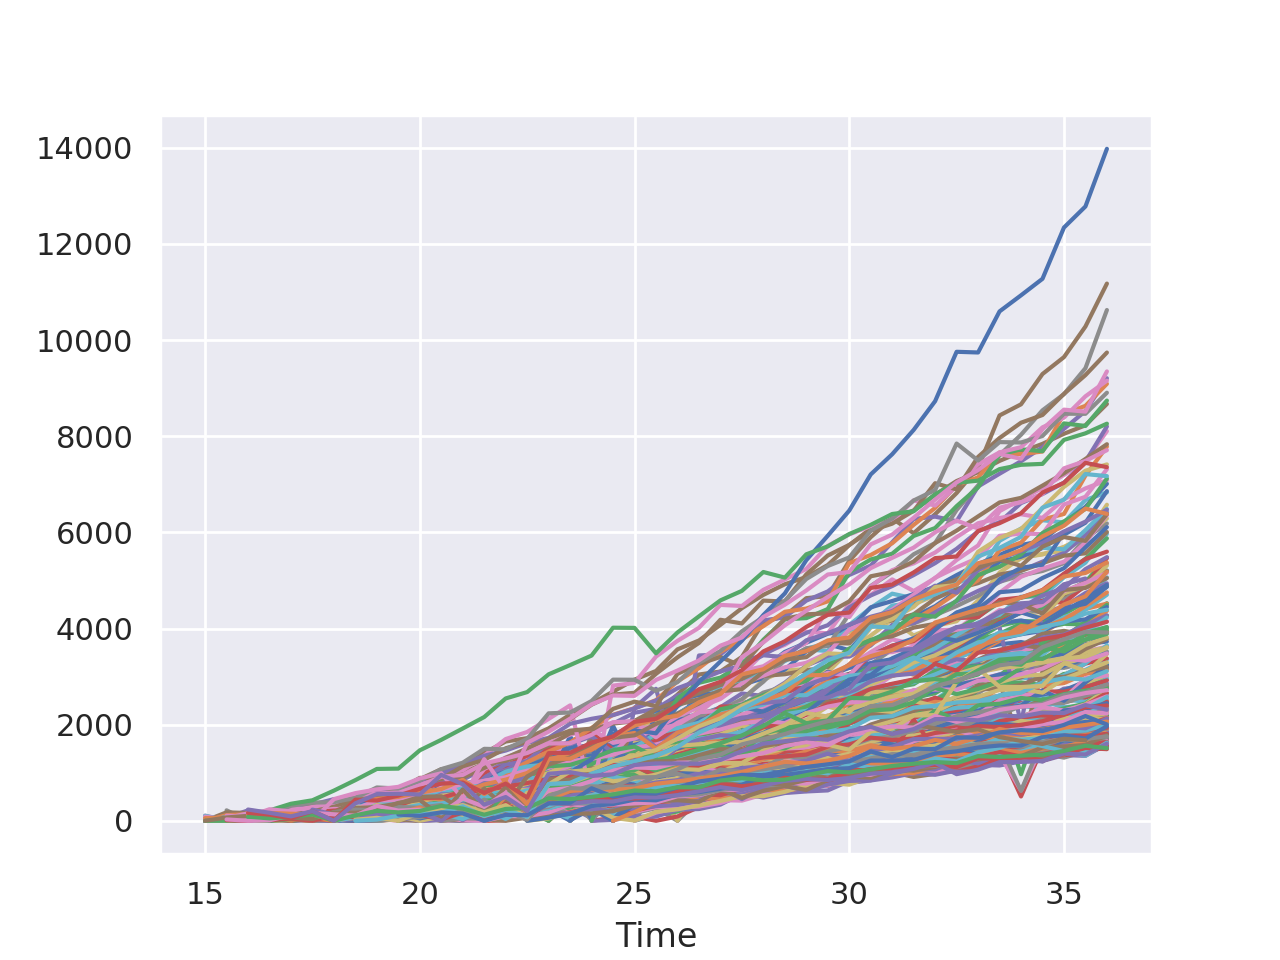

<IPython.core.display.Javascript object>


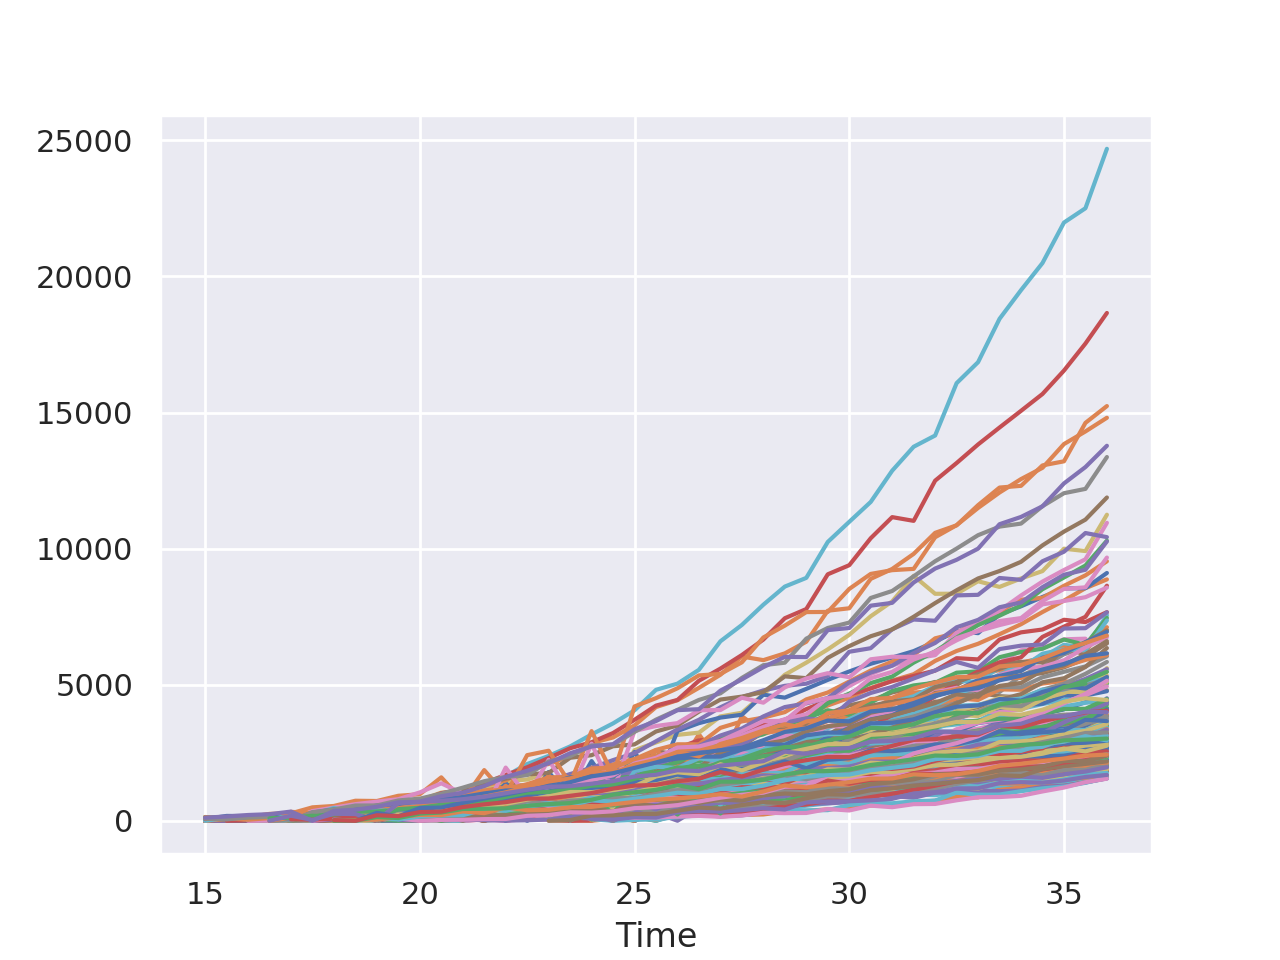

In [133]:
IN_IhtA_p.drop(columns=['std', 'mean']).plot(legend=False)
UN_IhtA_p.drop(columns=['std', 'mean']).plot(legend=False)

In [134]:
IN_IhtA_p

Sample_ID  A1-0-Track-349  A1-0-Track-829  A1-0-Track-833  A1-0-Track-845  \
Time                                                                        
15.0                  NaN             NaN             NaN             NaN   
15.5                  NaN             NaN             NaN             NaN   
16.0                  NaN             NaN             NaN             NaN   
16.5                  NaN             NaN             NaN             NaN   
17.0                  NaN             NaN             NaN             NaN   
17.5                  NaN             NaN             NaN             NaN   
18.0             0.000000             NaN             NaN             NaN   
18.5           203.871604             NaN             NaN             NaN   
19.0            13.182206             NaN             NaN             NaN   
19.5           341.167821             NaN             NaN             NaN   
20.0            37.581779             NaN             NaN             NaN   
20.5           442.821524             NaN             NaN             NaN   
21.0            80.466169             NaN             NaN             NaN   
21.5           500.323921             NaN             NaN             NaN   
22.0           595.215237             NaN             NaN             NaN   
22.5            16.109217             NaN             NaN             NaN   
23.0           665.761854             NaN             NaN             NaN   
23.5             9.083644        0.000000        0.000000             NaN   
24.0           656.975493      612.684603      882.295152      418.517848   
24.5           294.838039      253.620139      319.351092        0.000000   
25.0           915.776771      771.853490      998.006926      531.828982   
25.5           902.838039      795.582312      942.044752      594.255194   
26.0           889.654768      767.422483      927.545551      646.275440   
26.5           650.086841      548.646777      647.673948      360.040490   
27.0          1079.996803      903.752264     1106.599893      695.949920   
27.5          1080.690996     1049.183271     1068.974427      764.938199   
28.0          1292.678743      966.929142     1226.245605      828.252531   
28.5          1352.706979     1066.738412     1185.900906      929.403836   
29.0          1370.706979     1112.283964     1316.735216      967.543420   
29.5          1603.074054     1192.234417     1440.026638     1082.178476   
30.0          1664.173681     1345.835376     1449.273841     1085.151838   
30.5          1613.968567     1295.639318     1456.369739     1153.858817   
31.0          1636.632392     1338.580714     1579.192861     1265.348961   
31.5          1754.092168     1401.279702     1590.002131     1339.812999   
32.0          1769.022909     1490.977624     1663.986681     1291.123601   
32.5          1782.310602     1443.603623     1751.287693     1433.481087   
33.0          1849.393181     1528.489078     1806.824188     1457.148641   
33.5          1948.867342     1601.940863     1825.358551     1615.441662   
34.0          2010.587107     1671.236548     1922.719766     1716.147043   
34.5          1943.545551     1701.688332     1946.387320     1782.753863   
35.0          2040.970165     1742.921151     1979.681406     1767.773575   
35.5          2084.285029     1739.200320     1995.743207     1857.949920   
36.0          2095.612147     1835.588705     2196.677677     2031.519979   

Sample_ID  A1-0-Track-860  A1-0-Track-866  A1-0-Track-878  A1-1-Track-24  \
Time                                                                       
15.0                  NaN             NaN             NaN      30.939798   
15.5                  NaN             NaN             NaN       0.000000   
16.0                  NaN             NaN             NaN      40.919552   
16.5                  NaN             NaN             NaN     158.115077   
17.0                  NaN             NaN             NaN     119.164624   
17

In [135]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator
c = sns.color_palette('Set1',16).as_hex()
c[1]

'#377eb8'

<IPython.core.display.Javascript object>


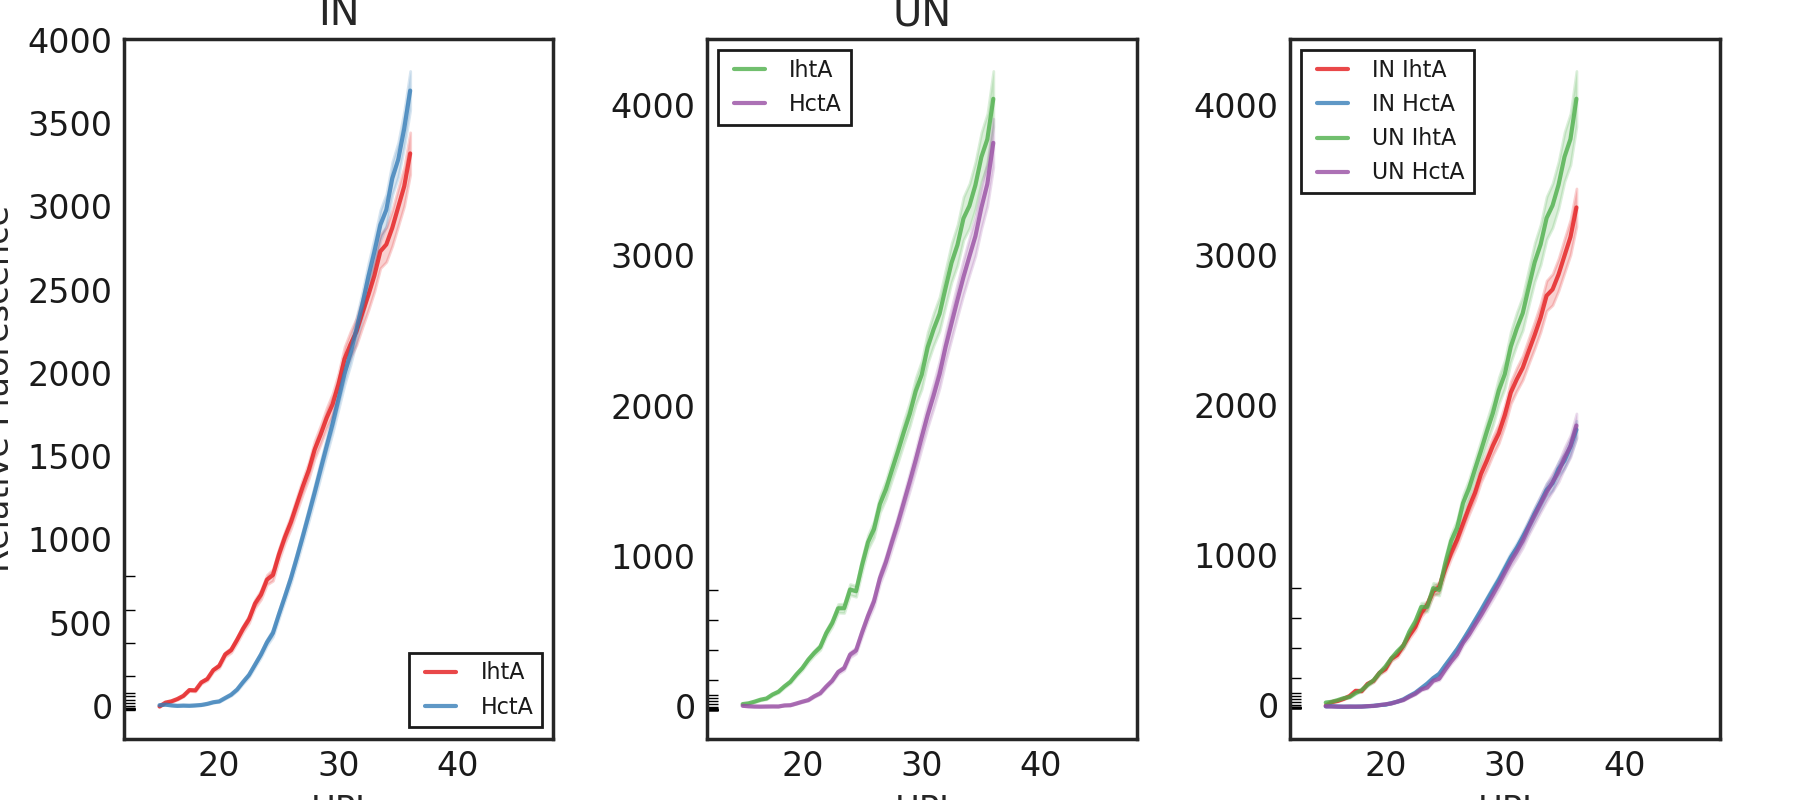

In [143]:
with plt.style.context('seaborn-white'):
    fig, (ax2,ax3,ax4) = plt.subplots(ncols=3)
    fig.tight_layout()
    

    def plot_sample_2(sample, color, name, style, mstyle, fcolor, i):
        ax2.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax2.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    
    plot_sample_2(IN_IhtA_p   , c[0],  'IhtA' , '-', '', 'None', 1)
    plot_sample_2(IN_HctA_p , c[1],   'HctA' , '-', '', 'None', 1)

       
    def plot_sample_3(sample, color, name, style, mstyle, fcolor, i):
        ax3.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)
     #    #ax1.fill_between(sample.index, sample['mean']-sample['std']-cor, sample['mean']+sample['std']-cor, color=color, alpha=0.15)
        ax3.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)    

    
    plot_sample_3(UN_IhtA_p  , c[2],   'IhtA', '-', '', 'None', 1)
    plot_sample_3(UN_HctA_p , c[3],   'HctA'  , '-', '', 'None', 1)

    
    def plot_sample_4(sample, color, name, style, mstyle, fcolor, i):
        ax4.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)
          #ax1.fill_between(sample.index, sample['mean']-sample['std']-cor, sample['mean']+sample['std']-cor, color=color, alpha=0.15)
        ax4.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)    
    
    plot_sample_4(IN_IhtA_p   , c[0],   'IN IhtA' , '-', '', 'None', 1)
    plot_sample_4(IN_HctA_p/2   , c[1],  'IN HctA'  , '-', '', 'None', 1)
    plot_sample_4(UN_IhtA_p , c[2],   'UN IhtA' , '-', '', 'None', 1)
    plot_sample_4(UN_HctA_p/2 , c[3],  'UN HctA'  , '-', '', 'None', 1)




with plt.style.context('classic'):
    ax2.legend(loc='lower right', fontsize=8)
    ax3.legend(loc='upper left', fontsize=8)
    ax4.legend(loc='upper left', fontsize=8)
    ax2.set_ylabel('Relative Fluorescence')
    ax2.set_xlabel('HPI')
    ax3.set_xlabel('HPI')
    ax4.set_xlabel('HPI')
    ax2.set_title('IN')
    ax3.set_title('UN')
    
  
   
    #ax2.set_yscale('symlog', linthreshy=10000)
    #ax3.set_yscale('symlog', linthreshy=1)

    
    #ax2.set_ylim([0.2, 100000])
    #ax3.set_ylim([-1000, 13000])
    #ax4.set_ylim([-1, 6000])
    #ax5.set_ylim([-50, 200])

    
    lminor = LogLocator(base=10 , subs=(0.0,0.2,0.4,0.6,0.8,1.0),numticks=10)
   
    ax2.yaxis.set_minor_locator(lminor)
    ax2.tick_params(reset= True, which='minor', length =4, direction='in', colors='black', right=False)
    ax3.yaxis.set_minor_locator(lminor)
    ax3.tick_params(reset= True, which='minor', length =4, direction='in', colors='black', right=False)
    ax4.yaxis.set_minor_locator(lminor)
    ax4.tick_params(reset= True, which='minor', length =4, direction='in', colors='black', right=False)


    ax2.set_xlim([12, 48])
    ax3.set_xlim([12, 48])
    ax4.set_xlim([12, 48])
    #ax5.set_xlim([30, 45])

   
    fig.set_size_inches(9, 4)
    #plt.savefig('Euo_HctB_PEN_Time.pdf')

In [92]:
# Calculate max, min, halfmax and time to halfmax
def halfmax(in_pd):
    in_pd_c1_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_1')
    in_pd_c1_p['max_c1'] = in_pd_c1_p.max(axis=1)
    in_pd_c2_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_2')
    in_pd_c2_p['max_c2'] = in_pd_c2_p.max(axis=1)
    #print(in_pd_c1_p)
    #in_pd_p['min'] = in_pd_p.min(axis=1)
    in_pd_c1_p['min_c1'] = 1
    in_pd_c2_p['min_c2'] = 1
    #in_pd_p['half_max'] = np.sqrt(in_pd_p['max']*in_pd_p['min'])
    #in_pd_c1_p['half_max_c1'] = np.sqrt(in_pd_c1_p['max_c1'])
    #in_pd_c2_p['half_max_c2'] = np.sqrt(in_pd_c2_p['max_c2'])
    in_pd_c1_p['half_max_c1'] = in_pd_c1_p['max_c1']/2
    in_pd_c2_p['half_max_c2'] = in_pd_c2_p['max_c2']/2
    #print(in_pd_p['half_max'])
    in_pd_f = in_pd_c1_p[['min_c1','max_c1', 'half_max_c1']]
    in_pd_f['min_c2'] = in_pd_c2_p['min_c2']
    in_pd_f['max_c2'] = in_pd_c2_p['max_c2']
    in_pd_f['half_max_c2'] = in_pd_c2_p['half_max_c2']
    in_pd_f.index.name = None
    in_pd_f['Sample_ID'] = in_pd_f.index
    #print(in_pd_c2_p['max_c2'])
    traces = in_pd
    
    traces_c1_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') 
    traces_c1_p_fill =  traces_c1_p.fillna(method='bfill') #back fill to frame 0
    traces_c1_p_fill.reset_index(inplace = True)
    df_c1_f = traces_c1_p_fill
    df_c1_f.set_index(df_c1_f['Time'], inplace=True)
    
    traces_c2_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') 
    traces_c2_p_fill =  traces_c2_p.fillna(method='bfill') #back fill to frame 0
    traces_c2_p_fill.reset_index(inplace = True)
    df_c2_f = traces_c2_p_fill
    df_c2_f.set_index(df_c2_f['Time'], inplace=True)
    
    time_halfmax_c1 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c1'])
    time_halfmax_c2 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c2'])
    for index, row in in_pd_f.iterrows():
        sampleID = row['Sample_ID']
        #print(sampleID)
        time_c1 = (df_c1_f[sampleID]-row['half_max_c1']).abs().sort_values().index[0]
        time_c2 = (df_c2_f[sampleID]-row['half_max_c2']).abs().sort_values().index[0]
      
        time_halfmax_c1 = time_halfmax_c1.append({'Sample_ID':sampleID, 'time_to_halfmax_c1': time_c1}, ignore_index=True)
        time_halfmax_c2 = time_halfmax_c2.append({'Sample_ID':sampleID, 'time_to_halfmax_c2': time_c2}, ignore_index=True)
       
    #data_summary = pd.merge(in_pd_f, time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    data_summary = pd.merge(time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    #still need to add x y coordinates at last time imaged
    df_time = df3[df3['Time']==35]
    df_time = df_time[['Sample_ID', 'X', 'Y']]
    #want to mearge with data_summary but only for Sample IDs in both)
    result = pd.merge(data_summary, df_time, how='inner', on=['Sample_ID'])
    return result

IN_hm = halfmax(IN_f)
UN_hm = halfmax(UN_f)

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [93]:
IN_hm

Sample_ID  time_to_halfmax_c1  time_to_halfmax_c2           X  \
0    A1-0-Track-349                29.0                27.0   30.715458   
1    A1-0-Track-829                28.5                27.0  170.369302   
2    A1-0-Track-833                28.5                27.0  176.308171   
3    A1-0-Track-845                30.5                29.0  232.423617   
4    A1-0-Track-860                29.0                27.0   90.475184   
..              ...                 ...                 ...         ...   
340  A3-9-Track-435                30.5                29.0  476.891576   
341   A3-9-Track-80                30.0                28.0  398.116769   
342   A3-9-Track-87                29.0                27.0  189.373839   
343   A3-9-Track-88                30.0                28.5   92.709300   
344   A3-9-Track-97                28.0                25.5   27.959256   

              Y  
0    465.093615  
1    241.733014  
2    555.986616  
3    502.827623  
4    446.134768  
..          ...  
340  339.319023  
341  178.498766  
342  341.454580  
343  138.704357  
344  133.582507  

[345 rows x 5 columns]

In [94]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import HoverTool
from collections import OrderedDict
from bokeh.layouts import layout
from bokeh.models import Toggle, BoxAnnotation, CustomJS

output_notebook()

c = sns.color_palette('Set1',1000).as_hex()

def interactive_graph(in_df):
    in_df_p = pivot(in_df, 'bc_channel_1')
    df_new = in_df_p[in_df_p.columns[0:-2]]
    result = halfmax(in_df)
    #result = in_df
    
    tools_to_show = 'box_zoom,save,hover,reset'
    p = figure(plot_height = 500, plot_width = 500,
               toolbar_location='above', tools=tools_to_show,
               # "easy" tooltips in Bokeh 0.13.0 or newer
               tooltips=[("Location","$name")])
    j=0
    for i, column in enumerate(df_new):
        trackx = result[result['Sample_ID'] == df_new.iloc[:,i].name].X.values
        tracky = result[result['Sample_ID'] == df_new.iloc[:,i].name].Y.values
        x = str(int(trackx))
        y = str(int(tracky))
        well = df_new.iloc[:,i].name.split('-')[0]
        field = df_new.iloc[:,i].name.split('-')[1]
        well = df_new.iloc[:,i].name
        name = well+', x='+x+', y='+y
        p.line(df_new.index.values, df_new.iloc[:,i].values, name = name, line_color=c[j], line_width=2.5)
        j=j+1
    p.legend.location = "top_left"
    p.legend.click_policy="mute"
    show(p)
interactive_graph(IN_f)

Loading BokehJS ...

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [73]:
##graphing with bokeh to find mouse over data
#
#from bokeh.io import push_notebook, show, output_notebook
#from bokeh.layouts import row
#from bokeh.plotting import figure
#output_notebook()
#from bokeh.plotting import figure, show, output_file
#from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
#from bokeh.models import HoverTool
#from collections import OrderedDict
#
#def spot_plot(title, in_df, color):
#    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
#    p = figure(title=title, tooltips=TOOLTIPS, y_range=(20, 40), x_range=(16, 16000), plot_width=600, plot_height=300)
#    source = ColumnDataSource(in_df)
#    p.circle(x='max_c2', y='time_to_halfmax_c1', size=10, color=color, alpha=0.25, source=source)
#    show(p)
#    
#spot_plot('UN', UN_hm, 'green')
#spot_plot('IN', IN_hm, 'blue')


In [95]:
def spot_plot(title, in_df, in_df2):
    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
    p = figure(title=title, tooltips=TOOLTIPS, y_range=(20, 40), x_range=(16, 35), plot_width=600, plot_height=300)
    source = ColumnDataSource(in_df)
    source2= ColumnDataSource(in_df2)
    p.circle(x='time_to_halfmax_c2', y='time_to_halfmax_c1', size=10, color='green', alpha=0.25, source=source)
    p.circle(x='time_to_halfmax_c2', y='time_to_halfmax_c1', size=10, color='blue', alpha=0.25, source=source2)
    show(p)
    
spot_plot('EMS', IN_hm, UN_hm)

In [144]:
#EUO vs HctB signal at 32 HPI
IN32 = IN_f[IN_f['Time']==35] #get values at 32 hours for all sample IDs
UN32 = UN_f[UN_f['Time']==35] #get values at 32 hours for all sample IDs
def spot_plot(title, in_df, in_df2):
    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
    p = figure(title=title, tooltips=TOOLTIPS, x_range=(0, 20000), y_range=(0,20000), plot_width=600, plot_height=300)
    source = ColumnDataSource(in_df)
    source2= ColumnDataSource(in_df2)
    p.circle(x='bc_channel_2', y='bc_channel_1', size=10, color='green', alpha=0.25, source=source)
    p.circle(x='bc_channel_2', y='bc_channel_1', size=10, color='blue', alpha=0.25, source=source2)
    show(p)
    
spot_plot('EUO vs HctB @32 HPI', UN32, IN32)

#We should totaly animate this over time to find the outliers

In [97]:
IN_f.sort_values('Time', inplace=True)
UN_f.sort_values('Time', inplace=True)
IN_f['treatment']='Induced'
UN_f['treatment']='Uninduced'

In [98]:
df3 = pd.concat([IN_f, UN_f])
df3.sort_values('Time', inplace=True)

In [141]:
IN_f['treatment']='Induced'
UN_f['treatment']='Uninduced'

df_plot = pd.concat([IN_f, UN_f])
df_plot.sort_values('Time', inplace=True)

import plotly.express as px
gapminder = px.data.gapminder()
fig = px.scatter(df_plot, x="bc_channel_2", y="bc_channel_2", animation_frame="Time",
           hover_name="Sample_ID", animation_group="Sample_ID", color='treatment',
           log_x=False, size_max=85, range_x=[-500, 25000], range_y=[-500, 20000], color_discrete_map = {"none": 'rgba(0, 0, 255, .8)', "EMS": 'rgba(0, 255, 0, .8)'})
fig.update_traces(marker=dict(size=6))
fig.show()
#hmm need x y and time